In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test = pd.read_csv('D:\python\연습\store/test.csv',encoding='CP949')
test.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    4052 non-null   float64
 10  겨울_구매건수    4089 non-null   float64
 11  봄_구매건수     4319 non-null   float64
 12  여름_구매건수    4009 non-null   float64
 13  아침_구매건수    3608 non-null   float64
 14  저녁_구매건수    3975 non-null   float64
 15  점심_구매건수    4861 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


#### 데이터의 행수, 열수를 확인

In [4]:
test.shape

(5000, 17)

#### 데이터 형을 확인

In [5]:
test.dtypes

custid         int64
총구매액           int64
구매건수           int64
평균구매가격         int64
평균할부개월수      float64
구매브랜드종류        int64
내점일수           int64
수입상품_구매비율    float64
주말방문비율       float64
가을_구매건수      float64
겨울_구매건수      float64
봄_구매건수       float64
여름_구매건수      float64
아침_구매건수      float64
저녁_구매건수      float64
점심_구매건수      float64
주구매코너         object
dtype: object

#### 결손값, 결측치, 결측값 확인

In [6]:
test.isnull().sum().sum()

6087

#### 데이터행별 결손값의 개수가 많은 순서로 정렬

In [7]:
test.isnull().sum(axis=0).sort_values(ascending=False)

아침_구매건수      1392
저녁_구매건수      1025
여름_구매건수       991
가을_구매건수       948
겨울_구매건수       911
봄_구매건수        681
점심_구매건수       139
주구매코너           0
평균할부개월수         0
총구매액            0
구매건수            0
평균구매가격          0
주말방문비율          0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
custid          0
dtype: int64

#### 데이터형이 수치형인 각종 통계량의 계산

In [8]:
test.describe()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
count,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,4052.000000,4089.000000,4319.000000,4009.000000,3608.000000,3975.000000,4861.000000
mean,102500.500000,3.441780e+06,34.811400,1.012712e+05,1.90960,17.703400,18.060400,17.448680,38.59578,10.469891,9.895573,10.624682,11.295086,8.595621,9.521258,21.641020
std,1443.520003,4.992757e+06,40.082429,8.359185e+04,0.72939,14.922063,19.313637,18.566486,24.25075,11.749245,11.357972,11.734012,12.038547,13.003838,13.082006,25.838899
min,100001.000000,-6.696500e+04,1.000000,-1.196000e+03,1.00000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,101250.750000,7.183012e+05,10.000000,5.499500e+04,1.40000,7.000000,6.000000,5.100000,22.90000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,6.000000
50%,102500.500000,1.839293e+06,22.000000,8.164500e+04,1.80000,13.000000,12.000000,12.500000,35.00000,7.000000,6.000000,7.000000,7.000000,4.000000,5.000000,13.000000
75%,103750.250000,4.085492e+06,44.000000,1.215162e+05,2.30000,24.000000,23.000000,24.000000,50.00000,13.000000,13.000000,14.000000,15.000000,10.000000,11.000000,27.000000
max,105000.000000,6.440467e+07,474.000000,1.887526e+06,12.00000,147.000000,187.000000,100.000000,100.00000,159.000000,158.000000,164.000000,109.000000,220.000000,227.000000,275.000000


#### 데이터형이 문자열인 각종 통계량의 계산

In [9]:
test.describe(include=[object])

,주구매코너
count,5000
unique,25
top,일반식품
freq,1293


In [10]:
train = pd.read_csv('D:\python\연습\store/train.csv', encoding='CP949')
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [11]:
train.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [12]:
train.shape

(5000, 18)

In [13]:
tdf = test.copy()
ndf = train.copy()

In [14]:
tdf['gender'] = ndf['gender']

In [15]:
tdf.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복,0
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복,0
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품,0
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠,0


#### 데이터의 시각화

In [16]:
import seaborn as sb
sb.set()

In [17]:
def bar_chart(feature):
    male = tdf[tdf['gender']==1][feature].value_counts()
    female = tdf[tdf['gender']==0][feature].value_counts()
    dff = pd.DataFrame([male, female])
    dff.index = ['Male', 'Female']
    dff.plot(kind='bar', stacked=True, figsize=(10,5))

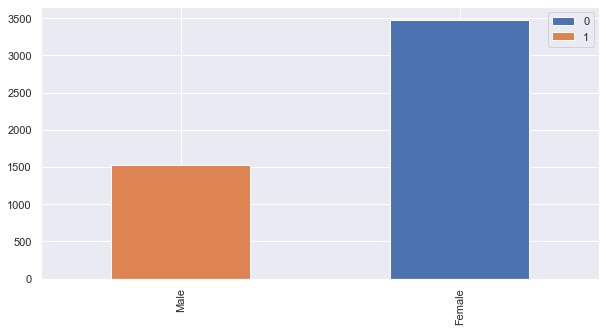

In [18]:
bar_chart('gender')

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
tdf['gender'].value_counts(normalize=True)

0    0.6958
1    0.3042
Name: gender, dtype: float64

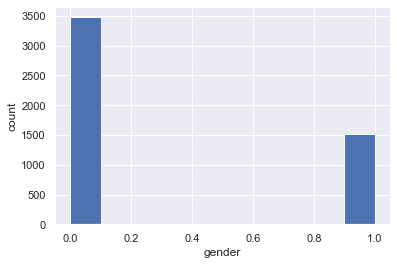

In [21]:
# gender의 히스토그램을 작성

plt.hist(tdf['gender'])
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [22]:
# matplotlib 패키지 한글화하기

In [23]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [24]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

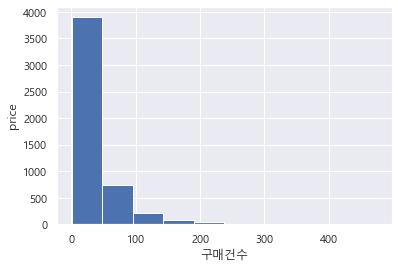

In [25]:
# 구매건수의 히스토그램을 작성

plt.hist(tdf['구매건수'])
plt.xlabel('구매건수')
plt.ylabel('price')
plt.show()

In [26]:
tdf['구매건수'].value_counts(normalize=True)

4      0.0322
10     0.0306
6      0.0296
7      0.0294
3      0.0294
        ...  
241    0.0002
243    0.0002
273    0.0002
305    0.0002
249    0.0002
Name: 구매건수, Length: 225, dtype: float64

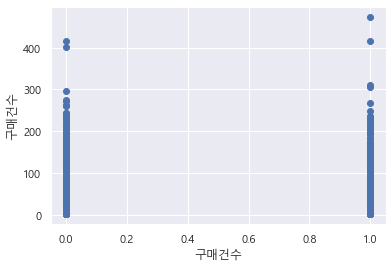

In [27]:
# gender와 구매건수의 산포도를 작성
plt.scatter(tdf['gender'], tdf['구매건수'])

plt.xlabel('구매건수')
plt.ylabel('구매건수')
plt.show()

In [28]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    4052 non-null   float64
 10  겨울_구매건수    4089 non-null   float64
 11  봄_구매건수     4319 non-null   float64
 12  여름_구매건수    4009 non-null   float64
 13  아침_구매건수    3608 non-null   float64
 14  저녁_구매건수    3975 non-null   float64
 15  점심_구매건수    4861 non-null   float64
 16  주구매코너      5000 non-null   object 
 17  gender     5000 non-null   int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


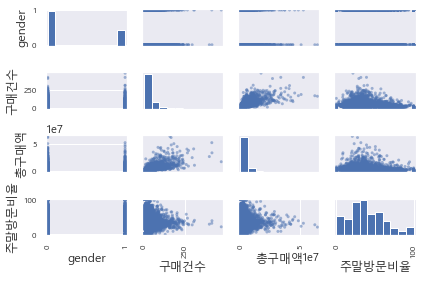

In [29]:
# 산포도행렬의 작성
pd.plotting.scatter_matrix(tdf[['gender', '구매건수', '총구매액', 
                                '주말방문비율']])
plt.tight_layout()
plt.show()

In [30]:
# 주구매코너의 레이블
주구매코너_label = tdf['주구매코너']\
        .value_counts(ascending=False, normalize=True)\
        .index
# 주구매코너의 값
주구매코너_vals = tdf['주구매코너']\
        .value_counts(ascending=False, normalize=True)\
        .values

In [31]:
주구매코너_label

Index(['일반식품', '화장품', '유니캐주얼', '유아동복', '스포츠', '영캐주얼', '캐릭터캐주얼', '수입명품', '니트단품',
       '섬유', '정장셔츠', '트래디셔널캐주얼', '장신구', '엘레강스캐주얼', '피혁A', '피혁B', '문화완구',
       '디자이너부띠끄', '조리욕실', '침구수예', '가전', '도자기크리스탈', '기타바이어', '타운모피', '가구'],
      dtype='object')

In [32]:
주구매코너_vals

array([0.2586, 0.2382, 0.0832, 0.083 , 0.0604, 0.0492, 0.0386, 0.025 ,
       0.0228, 0.018 , 0.0174, 0.0166, 0.0152, 0.0132, 0.0122, 0.0122,
       0.0086, 0.0082, 0.0074, 0.0028, 0.0024, 0.002 , 0.002 , 0.002 ,
       0.0008])

In [33]:
tdf.value_counts(ascending=False, normalize=True).index

MultiIndex([(105000,  2568073,  76,  33790, 1.6, 23,  35, 10.5, 22.9, ...),
            (101676,  1594987,  24,  66458, 1.8, 14,  14, 16.7, 35.7, ...),
            (101682,  5797396,  71,  81653, 2.1, 29,  23, 23.9, 34.8, ...),
            (101681,  2645351,  28,  94477, 1.1, 21,  19, 25.0, 63.2, ...),
            (101680,  1677823,  26,  64532, 1.1,  9,  19,  3.8, 84.2, ...),
            (101679,   807871,  43,  18788, 1.5, 15,  20,  9.3, 20.0, ...),
            (101678, 33577961, 177, 189706, 2.4, 46, 102,  6.2, 19.6, ...),
            (101677,  2517120,  28,  89897, 1.9, 13,   8, 32.1, 50.0, ...),
            (101675,  1952470,  37,  52769, 1.8, 23,  29,  2.7, 34.5, ...),
            (101685,  1716388,  40,  42910, 1.6,  9,  17,  2.5, 23.5, ...),
            ...
            (103330,  6974246,  72,  96865, 2.5, 38,  38,  8.3, 39.5, ...),
            (103331,  1170200,  13,  90015, 1.6, 11,   6, 15.4, 66.7, ...),
            (103336,  1484600,  15,  98973, 2.8, 12,   7, 13.3, 57.1, ..

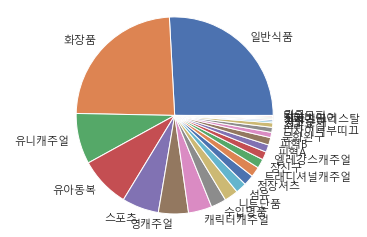

In [34]:
# 주구매코너의 원그래프를 작성
plt.pie(주구매코너_vals, labels=주구매코너_label)
plt.axis('equal') 
plt.show()

In [35]:
corr = tdf.corr()
corr

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,gender
custid,1.000000,-0.011799,-0.017261,-0.010172,-0.025228,-0.028394,-0.012957,0.007268,-0.004346,-0.011964,-0.012242,-0.014743,-0.015739,0.002869,-0.009018,-0.023013,0.261501
총구매액,-0.011799,1.000000,0.735196,0.388027,0.091697,0.744393,0.653925,-0.062130,-0.050965,0.647559,0.598966,0.657680,0.611261,0.406400,0.427438,0.723181,-0.006257
구매건수,-0.017261,0.735196,1.000000,-0.024959,-0.037095,0.868958,0.940284,-0.207060,-0.081005,0.892008,0.877970,0.882283,0.860464,0.648835,0.656592,0.932303,-0.015588
평균구매가격,-0.010172,0.388027,-0.024959,1.000000,0.300766,0.046020,-0.057755,0.165795,0.021181,-0.008595,-0.044888,-0.008267,-0.026394,-0.048100,-0.054223,0.000333,0.000866
평균할부개월수,-0.025228,0.091697,-0.037095,0.300766,1.000000,0.013032,-0.072252,0.054256,-0.024121,-0.026995,-0.056004,-0.035720,-0.036440,-0.055066,-0.037835,-0.023727,0.009953
구매브랜드종류,-0.028394,0.744393,0.868958,0.046020,0.013032,1.000000,0.784226,-0.222654,-0.064252,0.744774,0.736127,0.765295,0.733940,0.501617,0.581379,0.813953,-0.009232
내점일수,-0.012957,0.653925,0.940284,-0.057755,-0.072252,0.784226,1.000000,-0.223684,-0.095453,0.821727,0.817517,0.813033,0.809060,0.608337,0.648319,0.858814,-0.030724
수입상품_구매비율,0.007268,-0.062130,-0.207060,0.165795,0.054256,-0.222654,-0.223684,1.000000,0.002644,-0.153468,-0.157697,-0.158552,-0.166769,-0.124473,-0.134206,-0.174185,0.021430
주말방문비율,-0.004346,-0.050965,-0.081005,0.021181,-0.024121,-0.064252,-0.095453,0.002644,1.000000,-0.079840,-0.070289,-0.085563,-0.088236,-0.082420,-0.037608,-0.085875,-0.005511
가을_구매건수,-0.011964,0.647559,0.892008,-0.008595,-0.026995,0.744774,0.821727,-0.153468,-0.079840,1.000000,0.741614,0.714236,0.697278,0.575564,0.572429,0.823622,-0.005111


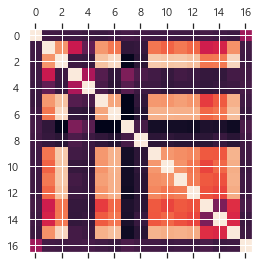

In [36]:
plt.matshow(corr)

In [37]:
corr.gender.sort_values(ascending=False)

gender       1.000000
custid       0.261501
수입상품_구매비율    0.021430
아침_구매건수      0.018611
평균할부개월수      0.009953
평균구매가격       0.000866
가을_구매건수     -0.005111
주말방문비율      -0.005511
총구매액        -0.006257
구매브랜드종류     -0.009232
봄_구매건수      -0.010636
여름_구매건수     -0.013912
구매건수        -0.015588
점심_구매건수     -0.017671
겨울_구매건수     -0.021246
저녁_구매건수     -0.025311
내점일수        -0.030724
Name: gender, dtype: float64

In [38]:
tdf.gender.value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [39]:
tdf.isnull().sum().sum()

6087

In [40]:
tdf['가을_구매건수'].fillna(round(tdf['가을_구매건수'].mean(),0) , inplace = True)
tdf['겨울_구매건수'].fillna(round(tdf['겨울_구매건수'].mean(),0) , inplace = True)
tdf['봄_구매건수'].fillna(round(tdf['봄_구매건수'].mean(),0) , inplace = True)
tdf['여름_구매건수'].fillna(round(tdf['여름_구매건수'].mean(),0) , inplace = True)
tdf['아침_구매건수'].fillna(round(tdf['아침_구매건수'].mean(),0) , inplace = True)
tdf['저녁_구매건수'].fillna(round(tdf['저녁_구매건수'].mean(),0) , inplace = True)
tdf['점심_구매건수'].fillna(round(tdf['점심_구매건수'].mean(),0) , inplace = True)
tdf.isnull().sum()

custid       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
gender       0
dtype: int64

In [41]:
ndf.isnull().sum().sum()

6107

In [42]:
ndf['가을_구매건수'].fillna(round(tdf['가을_구매건수'].mean(),0) , inplace = True)
ndf['겨울_구매건수'].fillna(round(tdf['겨울_구매건수'].mean(),0) , inplace = True)
ndf['봄_구매건수'].fillna(round(tdf['봄_구매건수'].mean(),0) , inplace = True)
ndf['여름_구매건수'].fillna(round(tdf['여름_구매건수'].mean(),0) , inplace = True)
ndf['아침_구매건수'].fillna(round(tdf['아침_구매건수'].mean(),0) , inplace = True)
ndf['저녁_구매건수'].fillna(round(tdf['저녁_구매건수'].mean(),0) , inplace = True)
ndf['점심_구매건수'].fillna(round(tdf['점심_구매건수'].mean(),0) , inplace = True)
ndf.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [43]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   object 
 17  gender     5000 non-null   int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [44]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [45]:
tdf.shape

(5000, 18)

In [46]:
ndf.shape

(5000, 18)

In [47]:
obj = ['주구매코너']

In [48]:
tdf[obj].head()

,주구매코너
0,장신구
1,유아동복
2,유아동복
3,수입명품
4,스포츠


In [49]:
ndf[obj].head()

,주구매코너
0,화장품
1,영캐주얼
2,장신구
3,화장품
4,피혁A


In [50]:
tdf[obj] = tdf[obj].apply(lambda x: x.astype('category').cat.codes)

In [51]:
ndf[obj] = tdf[obj].apply(lambda x: x.astype('category').cat.codes)

In [52]:
tdf[obj].head()

,주구매코너
0,15
1,13
2,13
3,8
4,9


In [53]:
ndf[obj].head()

,주구매코너
0,15
1,13
2,13
3,8
4,9


### 계절별, 시간별 컬럼 각각 합치기

In [54]:
drop_cols = ['봄_구매건수','여름_구매건수','겨울_구매건수','가을_구매건수','점심_구매건수','저녁_구매건수','아침_구매건수']

In [55]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   int8   
 17  gender     5000 non-null   int64  
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [56]:
from sklearn.impute import SimpleImputer
imputer_drop_cols = SimpleImputer(strategy="most_frequent")  
imputer_drop_cols.fit(tdf[drop_cols])

SimpleImputer(strategy='most_frequent')

In [57]:
from sklearn.impute import SimpleImputer
imputer_drop_cols = SimpleImputer(strategy="most_frequent")  
imputer_drop_cols.fit(ndf[drop_cols])

SimpleImputer(strategy='most_frequent')

In [58]:
x = imputer_drop_cols.transform(tdf[drop_cols])
x

array([[ 7.,  9.,  4., ..., 11.,  1., 13.],
       [10.,  8.,  8., ..., 25., 10.,  4.],
       [ 3.,  6.,  7., ..., 18.,  1.,  3.],
       ...,
       [ 6.,  1.,  1., ..., 12., 10.,  9.],
       [ 4.,  3.,  7., ...,  8.,  4.,  2.],
       [ 9., 24., 20., ..., 61.,  4., 11.]])

In [59]:
y = imputer_drop_cols.transform(ndf[drop_cols])
y

array([[ 6., 11.,  9., ...,  9.,  6.,  9.],
       [ 4., 11.,  5., ...,  6., 10.,  3.],
       [12., 11., 17., ..., 15., 11., 10.],
       ...,
       [ 6., 13.,  6., ..., 21., 10., 16.],
       [ 2.,  1.,  4., ..., 11.,  2.,  9.],
       [10., 11.,  5., ..., 19.,  5.,  8.]])

In [60]:
tdf[drop_cols] = x
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   int8   
 17  gender     5000 non-null   int64  
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [61]:
ndf[drop_cols] = x
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [62]:
dfX = tdf.drop(['gender','custid'], axis=1) 
dfy = tdf['gender']

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression()

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [65]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.697, 0.696, 0.696, 0.696, 0.695])

In [66]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.696
Std: 0.001
Min: 0.695
Max: 0.697


In [67]:
tdf['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [68]:
ndf['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [69]:
from imblearn.under_sampling import *

In [70]:
from imblearn.combine import SMOTETomek

In [71]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.697, 0.696, 0.696, 0.696, 0.695])

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [73]:
X_train, X_test, y_train, y_test = train_test_split(dfX, 
                                                    dfy, test_size=0.25, random_state=0)

In [74]:
tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)

tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       883
           1       0.17      0.01      0.02       367

    accuracy                           0.70      1250
   macro avg       0.44      0.50      0.42      1250
weighted avg       0.55      0.70      0.58      1250



In [75]:
from imblearn.under_sampling import TomekLinks

In [76]:
XX, yy = TomekLinks().fit_sample(X_train, y_train)
tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)
print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82       883
           1       0.22      0.01      0.02       367

    accuracy                           0.70      1250
   macro avg       0.46      0.50      0.42      1250
weighted avg       0.56      0.70      0.59      1250



In [77]:
XX, yy = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

In [78]:
tree3.score(X_test,y_test)

0.6968

In [79]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

0    883
1    367
Name: gender, dtype: int64


0.7064

# xgboost 전개 추가 부분


In [80]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [81]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [82]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [83]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [84]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[09:27:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67824	eval-logloss:0.67798
[1]	train-logloss:0.66587	eval-logloss:0.66597
[2]	train-logloss:0.65601	eval-logloss:0.65584
[3]	train-logloss:0.64765	eval-logloss:0.64791
[4]	train-logloss:0.64033	eval-logloss:0.64121
[5]	train-logloss:0.63457	eval-logloss:0.63539
[6]	train-logloss:0.62950	eval-logloss:0.63097
[7]	train-logloss:0.62515	eval-logloss:0.62720
[8]	train-logloss:0.62178	eval-logloss:0.62425
[9]	train-logloss:0.61872	eval-logloss:0.62177
[10]	train-logloss:0.61644	eval-logloss:0.61958
[11]	train-logloss:0.61416	eval-logloss:0.61786
[12]	train-logloss:0.61205	eval-logloss:0

[162]	train-logloss:0.52927	eval-logloss:0.62545
[163]	train-logloss:0.52874	eval-logloss:0.62555
[164]	train-logloss:0.52823	eval-logloss:0.62557
[165]	train-logloss:0.52795	eval-logloss:0.62570
[166]	train-logloss:0.52782	eval-logloss:0.62557
[167]	train-logloss:0.52738	eval-logloss:0.62548
[168]	train-logloss:0.52731	eval-logloss:0.62563
[169]	train-logloss:0.52652	eval-logloss:0.62609
[170]	train-logloss:0.52598	eval-logloss:0.62592
[171]	train-logloss:0.52548	eval-logloss:0.62588
[172]	train-logloss:0.52498	eval-logloss:0.62592
[173]	train-logloss:0.52465	eval-logloss:0.62596
[174]	train-logloss:0.52403	eval-logloss:0.62575
[175]	train-logloss:0.52345	eval-logloss:0.62593
[176]	train-logloss:0.52285	eval-logloss:0.62634
[177]	train-logloss:0.52238	eval-logloss:0.62645
[178]	train-logloss:0.52195	eval-logloss:0.62650
[179]	train-logloss:0.52181	eval-logloss:0.62664
[180]	train-logloss:0.52174	eval-logloss:0.62667
[181]	train-logloss:0.52166	eval-logloss:0.62675
[182]	train-logloss:

[330]	train-logloss:0.46748	eval-logloss:0.64270
[331]	train-logloss:0.46712	eval-logloss:0.64282
[332]	train-logloss:0.46673	eval-logloss:0.64275
[333]	train-logloss:0.46635	eval-logloss:0.64272
[334]	train-logloss:0.46595	eval-logloss:0.64305
[335]	train-logloss:0.46543	eval-logloss:0.64284
[336]	train-logloss:0.46527	eval-logloss:0.64304
[337]	train-logloss:0.46507	eval-logloss:0.64338
[338]	train-logloss:0.46472	eval-logloss:0.64332
[339]	train-logloss:0.46464	eval-logloss:0.64357
[340]	train-logloss:0.46418	eval-logloss:0.64376
[341]	train-logloss:0.46362	eval-logloss:0.64398
[342]	train-logloss:0.46327	eval-logloss:0.64429
[343]	train-logloss:0.46284	eval-logloss:0.64446
[344]	train-logloss:0.46240	eval-logloss:0.64438
[345]	train-logloss:0.46203	eval-logloss:0.64455
[346]	train-logloss:0.46167	eval-logloss:0.64504
[347]	train-logloss:0.46121	eval-logloss:0.64503
[348]	train-logloss:0.46072	eval-logloss:0.64521
[349]	train-logloss:0.46030	eval-logloss:0.64544
[350]	train-logloss:

In [85]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.361 0.264 0.299 0.179 0.337 0.38  0.2   0.165 0.663 0.136]


In [86]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [87]:
get_clf_eval(y_test, preds)

오차행렬
[[837  46]
 [339  28]]
정확도: 0.6920, 정밀도: 0.3784, 재현율: 0.0763


In [88]:
XX.columns

Index(['총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류', '내점일수', '수입상품_구매비율',
       '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수', '아침_구매건수',
       '저녁_구매건수', '점심_구매건수', '주구매코너'],
      dtype='object')

In [89]:
col = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n','o','p']

In [90]:
XX.head()

,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,4911200,38,129242,2.1,21,19,28.9,42.1,3.0,1.0,25.0,9.0,1.0,13.0,24.0,24
1,3750300,18,208350,1.2,12,9,38.9,100.0,10.0,10.0,4.0,4.0,9.0,12.0,6.0,10
2,14525845,244,59532,1.7,63,131,6.6,27.5,54.0,58.0,70.0,62.0,38.0,10.0,206.0,14
3,2066269,21,98394,1.4,11,14,4.8,21.4,9.0,8.0,2.0,2.0,2.0,7.0,12.0,14
4,8905841,21,424088,2.0,12,15,47.6,26.7,7.0,4.0,2.0,8.0,3.0,1.0,17.0,8


In [91]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(XX, yy, feature_name=col, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[LightGBM] [Warning] Unknown parameter: nestimators
[1]	valid_0's binary_logloss: 0.684097
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.676291
[3]	valid_0's binary_logloss: 0.671935
[4]	valid_0's binary_logloss: 0.668701
[5]	valid_0's binary_logloss: 0.665374
[6]	valid_0's binary_logloss: 0.662893
[7]	valid_0's binary_logloss: 0.660642
[8]	valid_0's binary_logloss: 0.659608
[9]	valid_0's binary_logloss: 0.658864
[10]	valid_0's binary_logloss: 0.657031
[11]	valid_0's binary_logloss: 0.655114
[12]	valid_0's binary_logloss: 0.654045
[13]	valid_0's binary_logloss: 0.651285
[14]	valid_0's binary_logloss: 0.651181
[15]	valid_0's binary_logloss: 0.650055
[16]	valid_0's binary_logloss: 0.649217
[17]	valid_0's binary_logloss: 0.648854
[18]	valid_0's binary_logloss: 0.64761
[19]	valid_0's binary_logloss: 0.646474
[20]	valid_0's binary_logloss: 0.645049
[21]	valid_0's binary_logloss: 0.6457
[22]	valid_0's binary_logloss: 0.646651
[23]	valid_0's bin

In [92]:
get_clf_eval(y_test, preds)

오차행렬
[[837  46]
 [339  28]]
정확도: 0.6920, 정밀도: 0.3784, 재현율: 0.0763


# Features engineering

In [93]:
# 학습용 데이터에 '코너별구매건' 컬럼 추가

dt0 = tdf.groupby(['주구매코너'])['구매건수'].agg(sum)   
df0 = dt0.to_frame().reset_index()
df0.columns = ['주구매코너', '코너별구매건']
#df0.head(3)
tdf_ = pd.merge(tdf, df0, on='주구매코너')
# dataP_.head()
print(tdf_[(tdf_['주구매코너']==1)].groupby(['gender'])['총구매액'].agg(sum))
print(tdf_[(tdf_['주구매코너']==1)].groupby(['gender'])['구매건수'].agg(sum))
tdf_.head()

gender
0    53063574
1    16347745
Name: 총구매액, dtype: int64
gender
0    160
1    159
Name: 구매건수, dtype: int64


,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender,코너별구매건
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,0,1315
1,100092,2973500,38,78250,4.2,20,16,7.9,43.8,10.0,10.0,13.0,5.0,9.0,3.0,26.0,15,0,1315
2,100130,3633456,41,88621,3.2,27,16,2.4,43.8,7.0,17.0,4.0,13.0,1.0,27.0,13.0,15,0,1315
3,100170,1536790,8,192099,2.5,8,5,12.5,0.0,2.0,3.0,2.0,1.0,9.0,10.0,8.0,15,1,1315
4,100274,1101000,8,137625,5.9,5,5,25.0,0.0,10.0,3.0,5.0,11.0,3.0,10.0,5.0,15,0,1315


In [94]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['아침구매액'] = np.round(df_p['총구매액']*(df_p['아침_구매건수'] /df_p['구매건수'] ), 3)
    df_p['점심구매액'] = np.round(df_p['총구매액']*(df_p['점심_구매건수'] /df_p['구매건수'] ), 3)
    df_p['저녁구매액'] = np.round(df_p['총구매액']*(df_p['저녁_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['봄구매액']   = np.round(df_p['총구매액']*(df_p['봄_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['여름구매액'] = np.round(df_p['총구매액']*(df_p['여름_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['가을구매액'] = np.round(df_p['총구매액']*(df_p['가을_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['겨울구매액'] = np.round(df_p['총구매액']*(df_p['겨울_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['내점구매율'] = np.round(df_p['구매건수'] /df_p['내점일수'], 3)

def dropFeatures(df_p):
    drop_col = ['아침_구매건수', '점심_구매건수', '저녁_구매건수', '총구매액', '구매건수',
         '봄_구매건수', '여름_구매건수', '가을_구매건수', '겨울_구매건수', '내점일수'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(tdf_)
tdff = dropFeatures(tdf_) 
tdff[(tdff['주구매코너']==2)].head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,주구매코너,gender,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
1122,100008,558610,9,62068,1.2,8,9,11.1,33.3,2,0,158,558610.000,310338.889,248271.111,62067.778,682745.556,248271.111,248271.111,1.000
1123,100281,918000,5,183600,4.4,5,4,20.0,25.0,2,0,158,1652400.000,918000.000,1836000.000,183600.000,2019600.000,183600.000,550800.000,1.250
1124,100371,4336880,51,85037,1.9,39,29,7.8,69.0,2,0,158,765331.765,2551105.882,1785774.118,425184.314,1530663.529,935405.490,1445626.667,1.759
1125,100386,3429200,22,155873,3.1,18,15,9.1,33.3,2,0,158,779363.636,2182218.182,467618.182,1402854.545,467618.182,1402854.545,155872.727,1.467
1126,100390,3407600,17,200447,1.2,13,8,5.9,12.5,2,0,158,1804023.529,2004470.588,1403129.412,200447.059,2605811.765,601341.176,2004470.588,2.125


In [95]:
import seaborn as sns

In [96]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:>

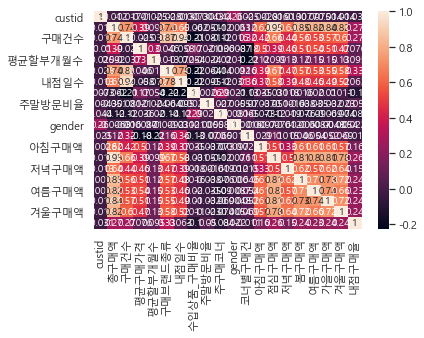

In [97]:
sns.heatmap(tdff.corr(), annot=True)

In [98]:
dataPT = tdff.copy()
dataPD = dataPT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)

dfy = dataPD['gender']
dfX = dataPD.drop('gender', axis=1)
dfX.tail(2)

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4998,104474,1605900,15,107060,15,10,319,107060.0,1284720.0,428240.0,321180.0,749420.0,107060.0,1.5
4999,104752,509000,8,63625,8,4,319,572625.0,381750.0,254500.0,254500.0,636250.0,636250.0,2.0


In [99]:
dfX.shape

(5000, 14)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [101]:
X_train.columns

Index(['custid', '총구매액', '구매건수', '평균구매가격', '구매브랜드종류', '내점일수', '코너별구매건',
       '아침구매액', '점심구매액', '봄구매액', '여름구매액', '가을구매액', '겨울구매액', '내점구매율'],
      dtype='object')

In [102]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 4154 to 2732
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   custid   3750 non-null   int64  
 1   총구매액     3750 non-null   int64  
 2   구매건수     3750 non-null   int64  
 3   평균구매가격   3750 non-null   int64  
 4   구매브랜드종류  3750 non-null   int64  
 5   내점일수     3750 non-null   int64  
 6   코너별구매건   3750 non-null   int64  
 7   아침구매액    3750 non-null   float64
 8   점심구매액    3750 non-null   float64
 9   봄구매액     3750 non-null   float64
 10  여름구매액    3750 non-null   float64
 11  가을구매액    3750 non-null   float64
 12  겨울구매액    3750 non-null   float64
 13  내점구매율    3750 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 439.5 KB


In [103]:
X_train.head(2)

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4154,101809,368000,5,73600,4,3,11500,662400.000,147200.000,220800.000,73600.000,736000.000,73600.000,1.667
4820,102483,4532150,26,174313,14,12,798,522940.385,3486269.231,871567.308,1045880.769,697253.846,1917448.077,2.167


In [104]:
xCol = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k','l','m','n']

In [105]:
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, feature_name=xCol, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals)
pred = lgbm_wrapper.predict(X_test)

[LightGBM] [Warning] Unknown parameter: nestimators
[1]	valid_0's binary_logloss: 0.607764
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.60148
[3]	valid_0's binary_logloss: 0.596591
[4]	valid_0's binary_logloss: 0.593092
[5]	valid_0's binary_logloss: 0.589605
[6]	valid_0's binary_logloss: 0.587994
[7]	valid_0's binary_logloss: 0.585964
[8]	valid_0's binary_logloss: 0.584288
[9]	valid_0's binary_logloss: 0.582306
[10]	valid_0's binary_logloss: 0.581493
[11]	valid_0's binary_logloss: 0.581234
[12]	valid_0's binary_logloss: 0.580242
[13]	valid_0's binary_logloss: 0.579939
[14]	valid_0's binary_logloss: 0.57958
[15]	valid_0's binary_logloss: 0.580374
[16]	valid_0's binary_logloss: 0.580883
[17]	valid_0's binary_logloss: 0.580736
[18]	valid_0's binary_logloss: 0.580264
[19]	valid_0's binary_logloss: 0.580155
[20]	valid_0's binary_logloss: 0.580877
[21]	valid_0's binary_logloss: 0.581373
[22]	valid_0's binary_logloss: 0.582306
[23]	valid_0's bi

In [106]:
get_clf_eval(y_test, preds)

오차행렬
[[821  49]
 [355  25]]
정확도: 0.6768, 정밀도: 0.3378, 재현율: 0.0658


# merge

In [107]:
df_sum = tdf.groupby('주구매코너')['구매건수'].sum()

In [108]:
df_sum.head()

주구매코너
0      49
1     319
2     158
3    2716
4     183
Name: 구매건수, dtype: int64

In [109]:
df_sum = df_sum.reset_index()
df_sum.columns = ['주구매코너', '코너별구매건']

In [110]:
df_sum

,주구매코너,코너별구매건
0,0,49
1,1,319
2,2,158
3,3,2716
4,4,183
5,5,1424
6,6,1107
7,7,1326
8,8,4541
9,9,10476


In [111]:
tdf.head(2)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13,0


In [112]:
df_sum.head(2)

,주구매코너,코너별구매건
0,0,49
1,1,319


In [113]:
# 데이터 합치기
df_merge = tdf.merge(df_sum, how='left', on='주구매코너')
df_merge

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender,코너별구매건
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,0,1315
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13,0,15923
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13,0,15923
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,9.0,4.0,42.0,8,0,4541
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,10.0,5.0,3.0,9.0,10.0,26.0,9,0,10476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,104996,670690,5,134138,1.4,5,4,0.0,75.0,1.0,2.0,2.0,11.0,1.0,1.0,3.0,14,1,74942
4996,104997,628700,13,48362,1.8,10,7,7.7,42.9,10.0,5.0,1.0,7.0,9.0,3.0,10.0,17,0,798
4997,104998,960923,12,80077,1.8,7,7,0.0,42.9,4.0,1.0,6.0,1.0,9.0,10.0,12.0,14,1,74942
4998,104999,786600,14,56186,1.7,12,9,14.3,55.6,10.0,7.0,4.0,3.0,2.0,4.0,8.0,24,1,26123


In [114]:
# 파생변수를 저장할 빈 리스트를 만든다
features = []

In [115]:
# 파생변수1 : 코너별구매건수
f = ndf.groupby('custid')['구매건수'].agg([('코너별구매건수', 'sum')]).reset_index()
features.append(f)
f

,custid,코너별구매건수
0,18,15
1,21,9
2,23,36
3,26,28
4,35,5
...,...,...
4995,49952,93
4996,49954,17
4997,49957,37
4998,49975,13


In [116]:
# 파생변수1 : 코너별구매건수
f = ndf.groupby('custid')['총구매액'].agg([('코너별구매액', 'sum')]).reset_index()
features.append(f)
f

,custid,코너별구매액
0,18,680100
1,21,353450
2,23,5671400
3,26,1964000
4,35,885000
...,...,...
4995,49952,6666517
4996,49954,3112100
4997,49957,5852482
4998,49975,654498


In [117]:
# 평균구매가격
f = ndf.groupby('custid')['총구매액'].agg([('평균구매가격', 'mean')]).reset_index()
features.append(f); f

,custid,평균구매가격
0,18,680100
1,21,353450
2,23,5671400
3,26,1964000
4,35,885000
...,...,...
4995,49952,6666517
4996,49954,3112100
4997,49957,5852482
4998,49975,654498


In [118]:
features

[      custid  코너별구매건수
 0         18       15
 1         21        9
 2         23       36
 3         26       28
 4         35        5
 ...      ...      ...
 4995   49952       93
 4996   49954       17
 4997   49957       37
 4998   49975       13
 4999   49993       32
 
 [5000 rows x 2 columns],
       custid   코너별구매액
 0         18   680100
 1         21   353450
 2         23  5671400
 3         26  1964000
 4         35   885000
 ...      ...      ...
 4995   49952  6666517
 4996   49954  3112100
 4997   49957  5852482
 4998   49975   654498
 4999   49993  2554723
 
 [5000 rows x 2 columns],
       custid   평균구매가격
 0         18   680100
 1         21   353450
 2         23  5671400
 3         26  1964000
 4         35   885000
 ...      ...      ...
 4995   49952  6666517
 4996   49954  3112100
 4997   49957  5852482
 4998   49975   654498
 4999   49993  2554723
 
 [5000 rows x 2 columns]]

In [119]:
df_train = pd.DataFrame({'custid': ndf.custid.unique()})
df_train

,custid
0,18
1,21
2,23
3,26
4,35
...,...
4995,49952
4996,49954
4997,49957
4998,49975


In [120]:
for f in features:
    df_train = pd.merge(df_train, f, how='left')
    
display(df_train)    

,custid,코너별구매건수,코너별구매액,평균구매가격
0,18,15,680100,680100
1,21,9,353450,353450
2,23,36,5671400,5671400
3,26,28,1964000,1964000
4,35,5,885000,885000
...,...,...,...,...
4995,49952,93,6666517,6666517
4996,49954,17,3112100,3112100
4997,49957,37,5852482,5852482
4998,49975,13,654498,654498


In [121]:
tdf.head(2)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13,0


## 문자열을 수치로 변환


In [122]:
# 주구매코너을 더미 변수로 변경(one-hot encoding) 
tdf_주구매코너 = pd.get_dummies(tdf['주구매코너'])
tdf_주구매코너

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [123]:
tdf.dtypes

custid         int64
총구매액           int64
구매건수           int64
평균구매가격         int64
평균할부개월수      float64
구매브랜드종류        int64
내점일수           int64
수입상품_구매비율    float64
주말방문비율       float64
가을_구매건수      float64
겨울_구매건수      float64
봄_구매건수       float64
여름_구매건수      float64
아침_구매건수      float64
저녁_구매건수      float64
점심_구매건수      float64
주구매코너           int8
gender         int64
dtype: object

In [124]:
# 원래의 데이터 세트에서 수치항목을 추출
tmp1 = tdf[['custid', '총구매액', '구매건수', '평균구매가격', '구매브랜드종류',
                '내점일수', '주구매코너', 'gender']]

# 선두에서 5행까지 표시
tmp1.head()

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,주구매코너,gender
0,100001,3439000,25,137560,19,16,15,0
1,100002,2073090,39,53156,18,29,13,0
2,100003,1303800,22,59264,14,12,13,0
3,100004,6696522,46,145577,31,22,8,0
4,100005,1297640,26,49909,13,9,9,0


In [125]:
tdf_주구매코너.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 모델작성

In [126]:
import pandas as pd
import numpy as np

In [127]:
tdf_new = tdf
tdf_new.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13,0
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13,0
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,9.0,4.0,42.0,8,0
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,10.0,5.0,3.0,9.0,10.0,26.0,9,0


In [128]:
tdf_new.to_csv('test-prep.csv', index=False)

In [129]:
import pandas as pd
import numpy as np

In [130]:
tdf_new = pd.read_csv('test-prep.csv', sep=',')
tdf_new.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13,0
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13,0
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,9.0,4.0,42.0,8,0
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,10.0,5.0,3.0,9.0,10.0,26.0,9,0


##### 불균형데이터의 균형화

In [131]:
tdf_new['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [132]:
!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.7.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: None
Author-email: None
License: MIT
Location: c:\anaconda3\lib\site-packages
Requires: scipy, scikit-learn, joblib, numpy
Required-by: 


In [133]:
# 불균형 데이터 세트에 대한 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler

# 오버 샘플링
from imblearn.over_sampling import RandomOverSampler

In [134]:
X = np.array(tdf_new.drop('gender', axis=1))
X

array([[1.000010e+05, 3.439000e+06, 2.500000e+01, ..., 1.000000e+00,
        1.100000e+01, 1.500000e+01],
       [1.000020e+05, 2.073090e+06, 3.900000e+01, ..., 1.000000e+01,
        2.500000e+01, 1.300000e+01],
       [1.000030e+05, 1.303800e+06, 2.200000e+01, ..., 1.000000e+00,
        1.800000e+01, 1.300000e+01],
       ...,
       [1.049980e+05, 9.609230e+05, 1.200000e+01, ..., 1.000000e+01,
        1.200000e+01, 1.400000e+01],
       [1.049990e+05, 7.866000e+05, 1.400000e+01, ..., 4.000000e+00,
        8.000000e+00, 2.400000e+01],
       [1.050000e+05, 2.568073e+06, 7.600000e+01, ..., 4.000000e+00,
        6.100000e+01, 1.400000e+01]])

In [135]:
Y = np.array(tdf_new['gender'])
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [136]:
# gender가 1과 0인 데이터의 건수를 카운트
print(np.sum(Y == 1), np.sum(Y == 0))

1521 3479


In [137]:
# gender가 1인 데이터의 건수에 맞춰서 다운사이징
sampler = RandomUnderSampler(random_state=42)
X, Y = sampler.fit_resample(X, Y)

In [138]:
# gender가 1과 0인 데이터의 건수를 카운트
print(np.sum(Y == 1), np.sum(Y == 0))

1521 1521


In [139]:
#결정트리의 작성과 검증
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

In [140]:
# K-Fold 교차검증
# 10개의 테스터 데이터셋으로 구성된 데이터셋으로 나누고 각각의 데이터셋을 섞어준다.
kf = KFold(n_splits=10, shuffle=True)

In [141]:
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [142]:
# 모델의 정밀도를 보존할 준비
scores = []

In [143]:
# 데이터를 셔플하고, 훈련데이터와 테스트데이트로 분할
for train_id, test_id in kf.split(X):
    # 훈련 데이터를 사용하여 모델을 작성
    x = X[train_id]
    y = Y[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    # 테스트 데이터에 모델을 적용
    pred_y = clf.predict(X[test_id])
    # 모델의 정밀도를 계산해서 보존
    score = accuracy_score(Y[test_id], pred_y)
    scores.append(score)

# 모델의 평균정밀도, 표준편차를 확인
scores = np.array(scores)
print(scores.mean(), scores.std(), scores.max(), scores.min())

0.5463567730802416 0.013506280669601177 0.5657894736842105 0.5197368421052632


In [144]:
# Scikit-learn의 로드
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# 재현률, 적합도의 확인
#print(confusion_matrix(Y[test_id], pred_y))
print(recall_score(Y[test_id], pred_y))
print(precision_score(Y[test_id], pred_y))

0.5774647887323944
0.5157232704402516


### 모델의 정밀도 향상(모델 튜닝)


In [145]:
# 모델작성용 파라미터 확인
print(clf)

DecisionTreeClassifier()


In [146]:
# 그리드 서치를 사용한 모델의 성능 개선
from sklearn.model_selection import GridSearchCV

In [147]:
# 그리드 서치를 사용한 모델의 성능 개선
from sklearn.model_selection import GridSearchCV
# 패러메터 범위설정
params = {
    'criterion': ['entropy'],    
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 40, 50],
}

In [148]:
# 그리드 서치의 실행조건을 설정
clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
                cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [149]:
from sklearn.tree import DecisionTreeClassifier
tree11 = DecisionTreeClassifier(max_depth=6, random_state=0)
tree11.fit(X, Y).score(X[test_id],Y[test_id])

0.6217105263157895

In [150]:
# 그리드 서치 실행
clf_gs.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [151]:
# 가장 높은 성능일 때의 모델에 대한 정밀도와 파라미터 조합 확인
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.6305133735979294
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 20}


In [152]:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 30}
# 최적의 파라미터를 사용한 모델 완성
clf_best = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=10, min_samples_leaf=20)
clf_best.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20)

In [153]:
# 영향이 높은 변수를 확인
print(clf_best.feature_importances_)

[0.5278748  0.07406331 0.01932149 0.03168964 0.02977267 0.02010362
 0.03060375 0.03499045 0.05108407 0.03185161 0.00572298 0.02520948
 0.03891664 0.03069407 0.00868646 0.03209409 0.00732086]


#### 변수의 영향도 시각화

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split

In [155]:
features = tdf_new.drop(['custid'], axis=1).columns.values
features

array(['총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류', '내점일수',
       '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수',
       '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너', 'gender'], dtype=object)

In [156]:
# Scatter plot
trace = go.Scatter(
    y = clf_best.feature_importances_,
    x = features,
    mode = 'markers',
    marker = dict(
                    sizemode = 'diameter',
                    sizeref = 1,
                    size = 13,
                    color = clf_best.feature_importances_,
                    colorscale = 'Portland',
                    showscale = True
                 ),
    text = features
)

data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'H백화점 Feature Importance ',
    hovermode = 'closest',
        xaxis = dict(
            ticklen = 5,
            showgrid = False,
            zeroline = False,
            showline = False
        ),
        yaxis = dict(
            title = 'Feature Importance',
            showgrid = False,
            zeroline = False,
            ticklen = 5,
            gridwidth = 2
        ),
        showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter2021')